In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from utils import save_images, plot_tsne, create_dataloaders
from AutoDecoder import AutoDecoder, AutoDecoderTrainer 

In [2]:
# Set up the dataset and dataloaders
train_ds, train_dl, test_ds, test_dl = create_dataloaders(batch_size=64)

In [3]:
# first_image = train_ds[0][1]  # Assuming dataset returns (index, image) tuple

# # Convert the image tensor to numpy for visualization
# image = first_image.squeeze().numpy()  # Squeeze to remove any channel dimension if needed

# # Display the image
# plt.imshow(image, cmap='gray')  # Assuming it's a grayscale image
# plt.title("First Image")
# plt.axis('off')
# plt.show()

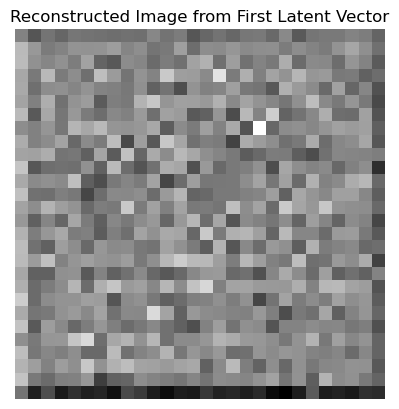

Epoch [1/30]:   0%|          | 0/16 [00:00<?, ?it/s]


RuntimeError: indices should be either on cpu or on the same device as the indexed tensor (cpu)

In [4]:
# Define the AutoDecoder model
latent_dim = 64

num_samples = len(train_ds)  # Adjust number of samples based on training data

auto_decoder = AutoDecoder(latent_dim=latent_dim, num_samples=num_samples)

# Initialize the trainer
trainer = AutoDecoderTrainer(auto_decoder, train_dl, test_dl, device='cuda' if torch.cuda.is_available() else 'cpu')

epochs = 30

trainer.train(num_epochs=epochs)

# Evaluate the model
# trainer.evaluate(epochs=epochs)

# Visualize reconstructions on the test set
# Sample from the latent space and visualize the results
# trainer.sample_latent_space(n_samples=5)


